## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Illustrating Fixed-point and Gradient-based optimization methods

Assume that the objective function is 
$$
E(x,y)=
\left[\begin{array}{l}x-x_0 & y-y_0\end{array}\right]
M
\left[\begin{array}{l}x-x_0 \\ y-y_0\end{array}\right]
$$

where 

$$
\begin{array}{l}
&M = R^T S R \\
&S = \left[\begin{array}{ll}
s & 0 \\
0 & t
\end{array}\right]\\
&R = \left[\begin{array}{ll}
cos(\theta) & sin(\theta) \\
-sin(\theta) & cos(\theta)
\end{array}\right]\\
\end{array}
$$

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np
import math

In [2]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 600

In [3]:
x0 = 0
y0 = 0
a = 1
b = 1/10
s = 1/a ** 2
t = 1/b ** 2
theta = np.pi / 4
R = np.array([[math.cos(theta),  math.sin(theta)],
              [-math.sin(theta), math.cos(theta)]])
S = np.array([[s, 0],
              [0, t]])
M = R.T @ S @ R
#M = np.matmul(np.matmul(np.transpose(R),S), R)

In [4]:
xs=np.arange(-4,4,0.1)
ys=np.arange(-4,4,0.1)
E = np.ndarray([len(xs),len(ys)])
for i,x in enumerate (xs):
    for j,y in enumerate(ys):
        p = np.array([x,y])
        E[i,j] = np.matmul(np.matmul(p, M), np.transpose(p))
X, Y = np.meshgrid(xs, ys)

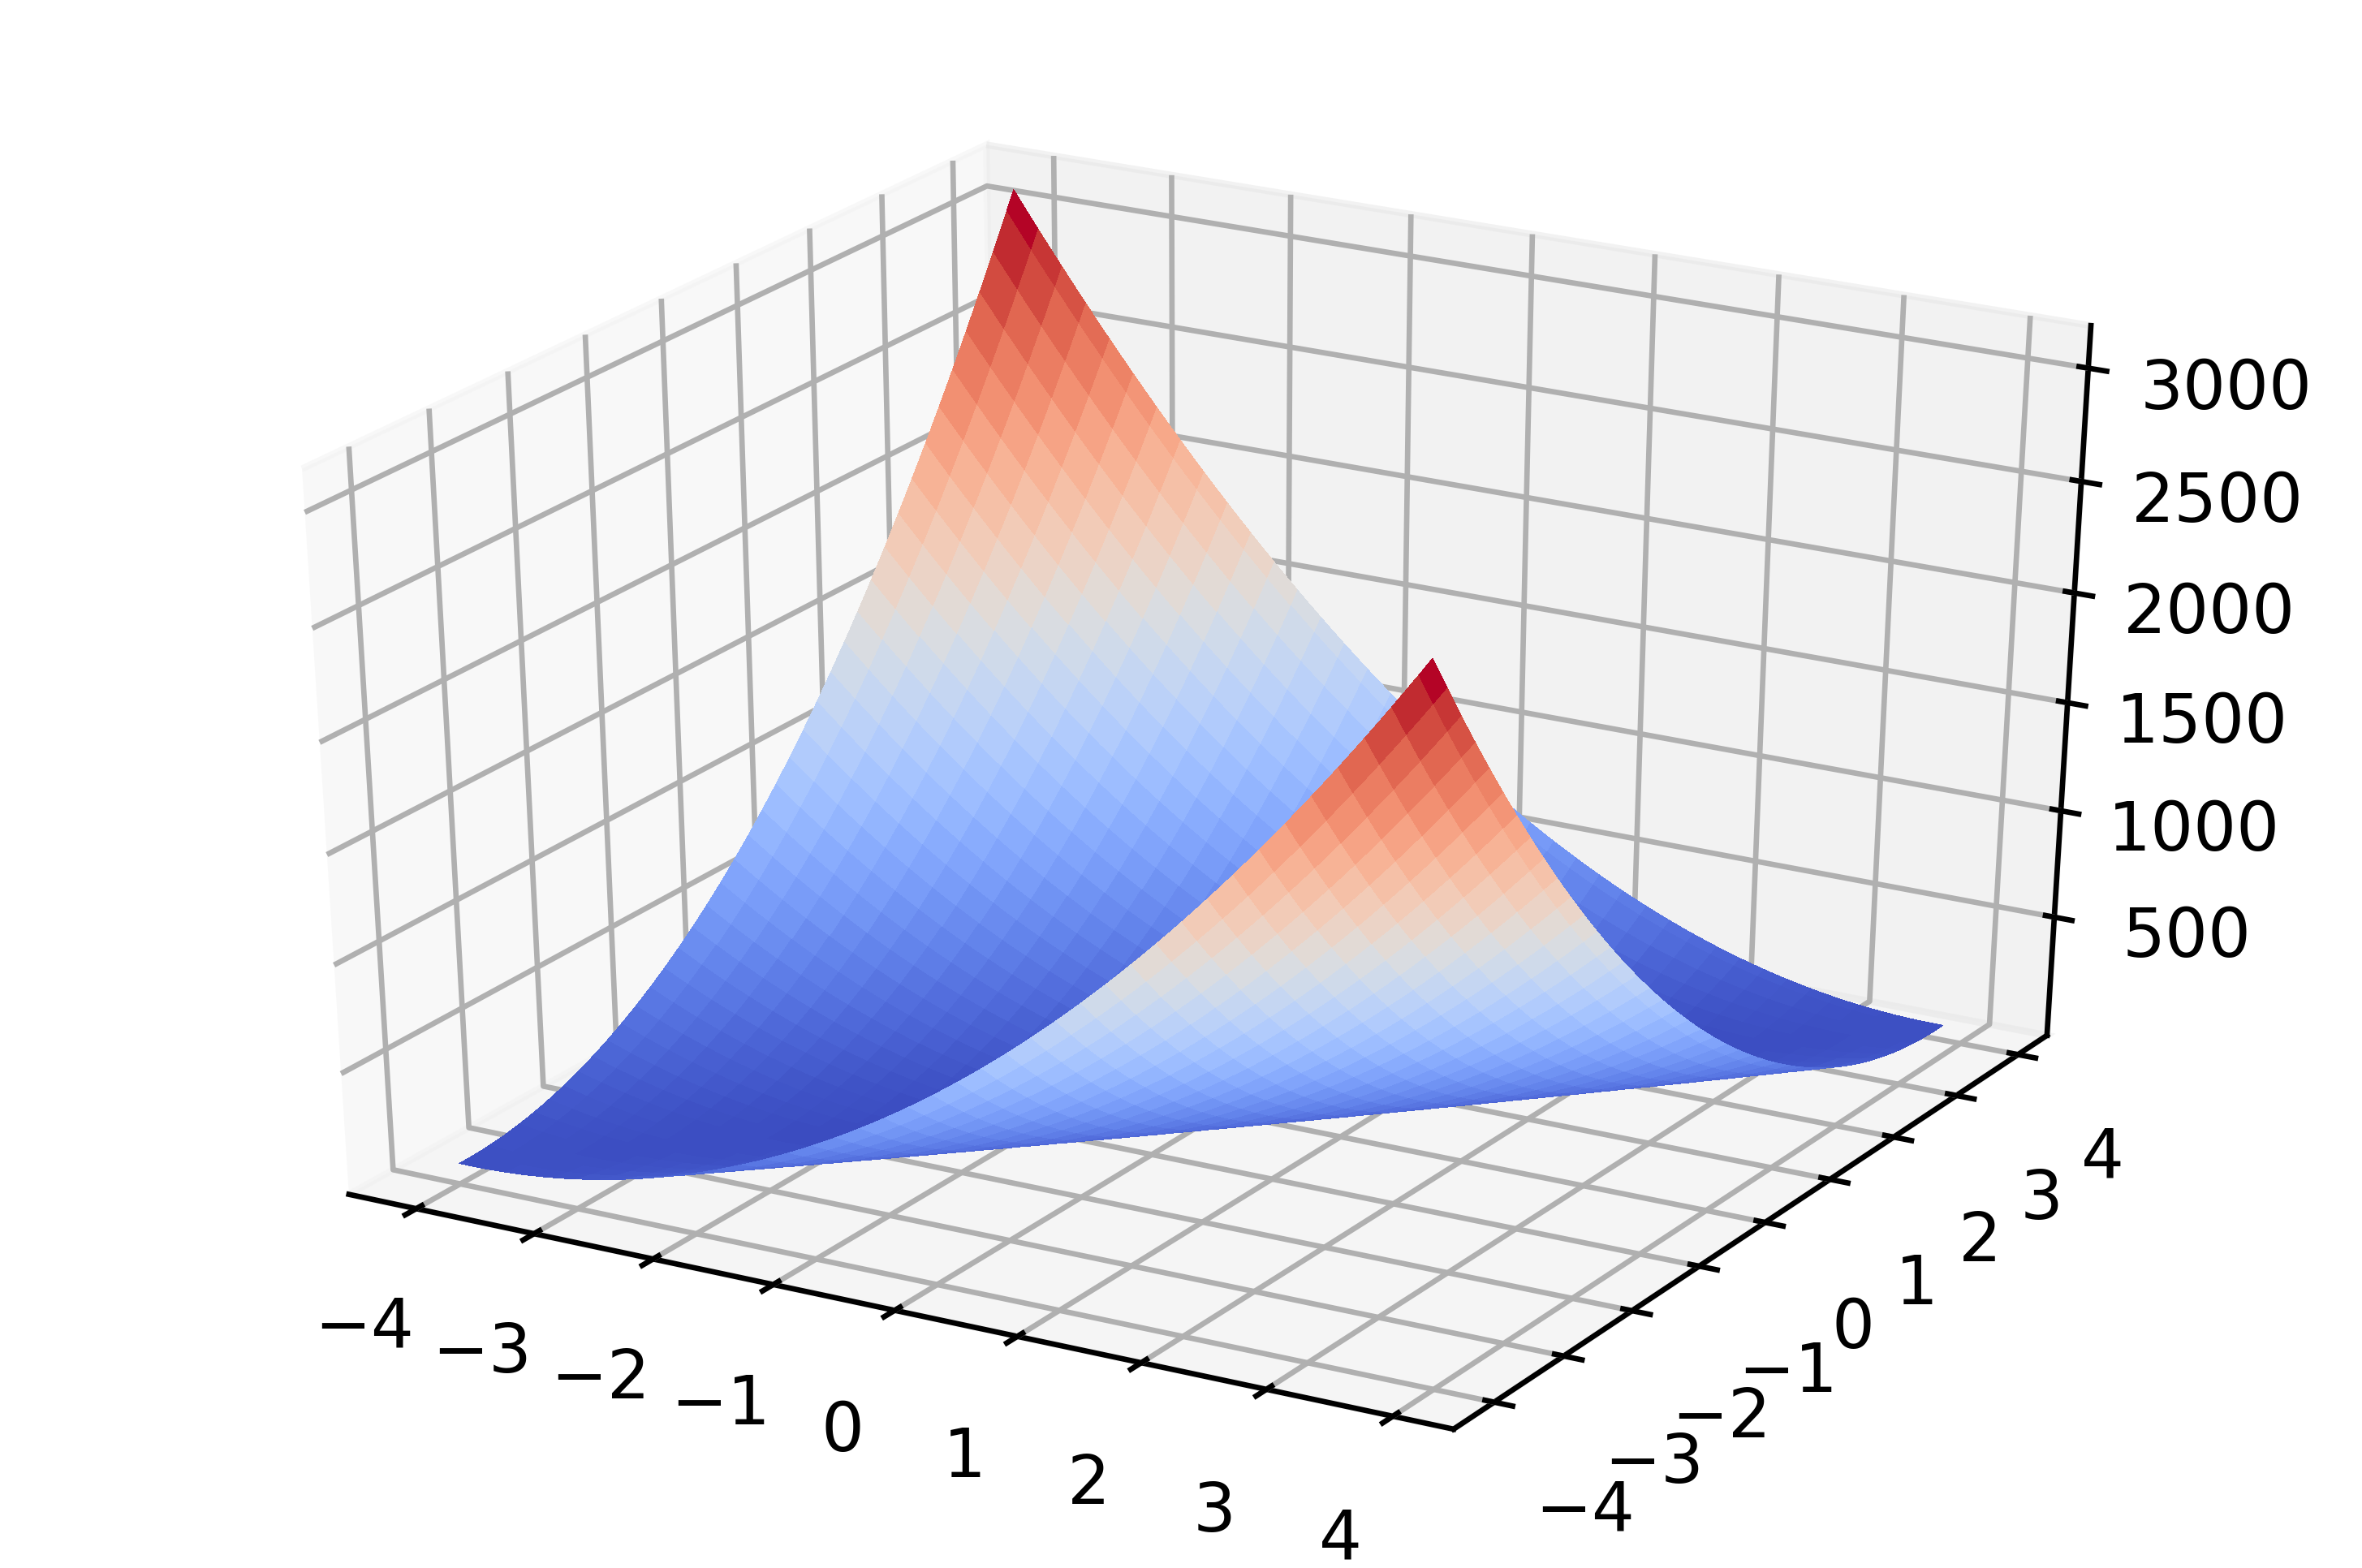

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, E, \
                       cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()

## Minimization using fixed-point method

We have:
    $$\frac{\partial E}{x}=2 M_{1,1}x + (M_{1,2}+M_{2,1})y$$
and 
    $$\frac{\partial E}{y}=2 M_{2,2}y + (M_{1,2}+M_{2,1})x$$

We set the gradient equal to zero, i.e.
$$ 2 M_{1,1}x + (M_{1,2}+M_{2,1})y = 0 \\
2 M_{2,2}y + (M_{1,2}+M_{2,1})x = 0 $$

By writing $x$ using the first equation and $y$ based on the second equation, we have:

$$ x = -\frac{(M_{1,2}+M_{2,1})y}{2M_{1,1}}\\
y = -\frac{(M_{1,2}+M_{2,1})x}{2M_{2,2}}$$

Note that the minimum is achieved at the point $[0,0]$.


### Fixed point algorithm

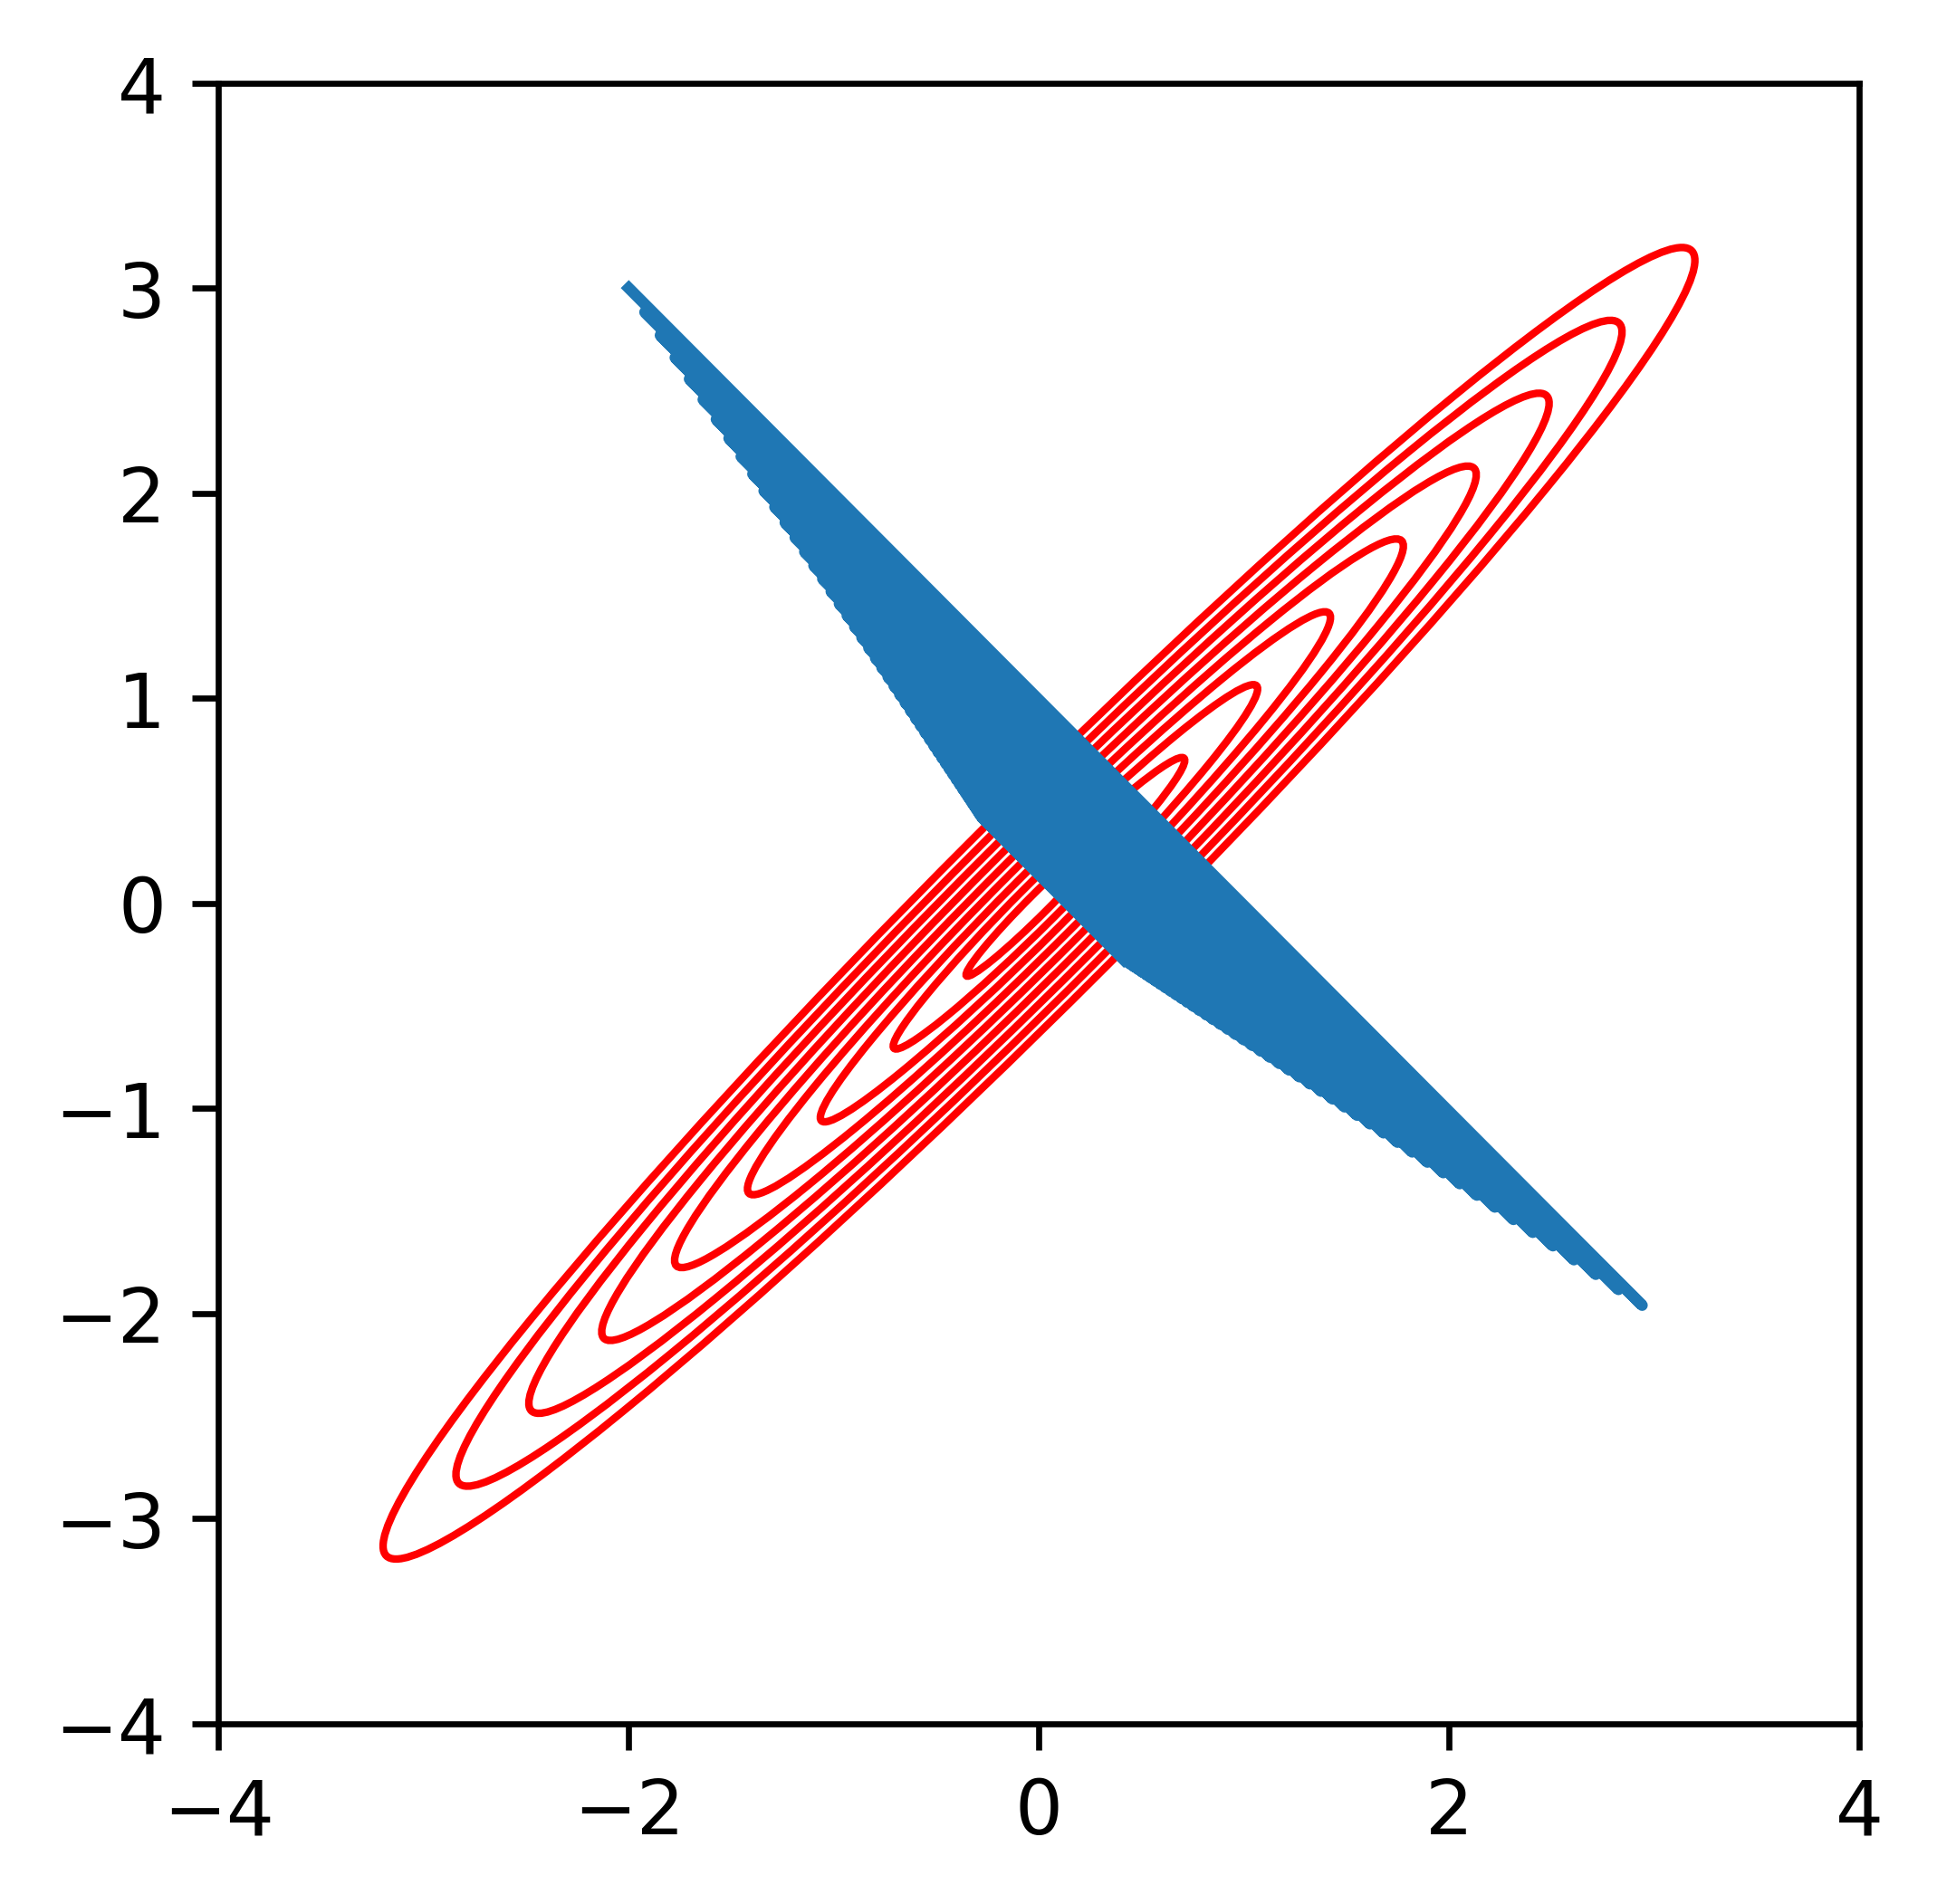

0.41418037348554393
-0.2761202489903626


In [6]:
from matplotlib.patches import Ellipse

T = 100
x = np.zeros([T])
y = np.zeros([T])

x[0] = -2
y[0] = 3

for i in range (1,T):
    x[i] = -((M[0,1]+M[1,0])*y[i-1])/(2* M[0,0])
    y[i] = -((M[0,1]+M[1,0])*x[i-1])/(2* M[1,1])

ax = plt.subplot(111, aspect='equal')
for scale in np.arange (10):
    width = scale * a
    height = scale * b
    e = Ellipse((x0, y0), width, height, theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)
plt.plot(x,y)
plt.xlim(-4,4)
plt.ylim(-4,4)

plt.show()
print(x[T-1])
print(y[T-1])

## Minimization using Gradient descent

We have:
    $$\frac{\partial E}{x}=2 M_{1,1}x + (M_{1,2}+M_{2,1})y$$
and 
    $$\frac{\partial E}{y}=2 M_{2,2}y + (M_{1,2}+M_{2,1})x$$

Therefore,

$$
\nabla E = \left[\begin{array}{l}
2 M_{1,1}x + (M_{1,2}+M_{2,1})y \\
2 M_{2,2}y + (M_{1,2}+M_{2,1})x
\end{array}
\right]
$$
The update rule for the gradient descent algorithm is:

$$\left[\begin{array}{l}x^{new}\\y^{new}\end{array}\right] = 
\left[\begin{array}{l}x^{old}\\y^{old}\end{array}\right]
- \alpha \nabla E$$

### The gradient descent algorithm

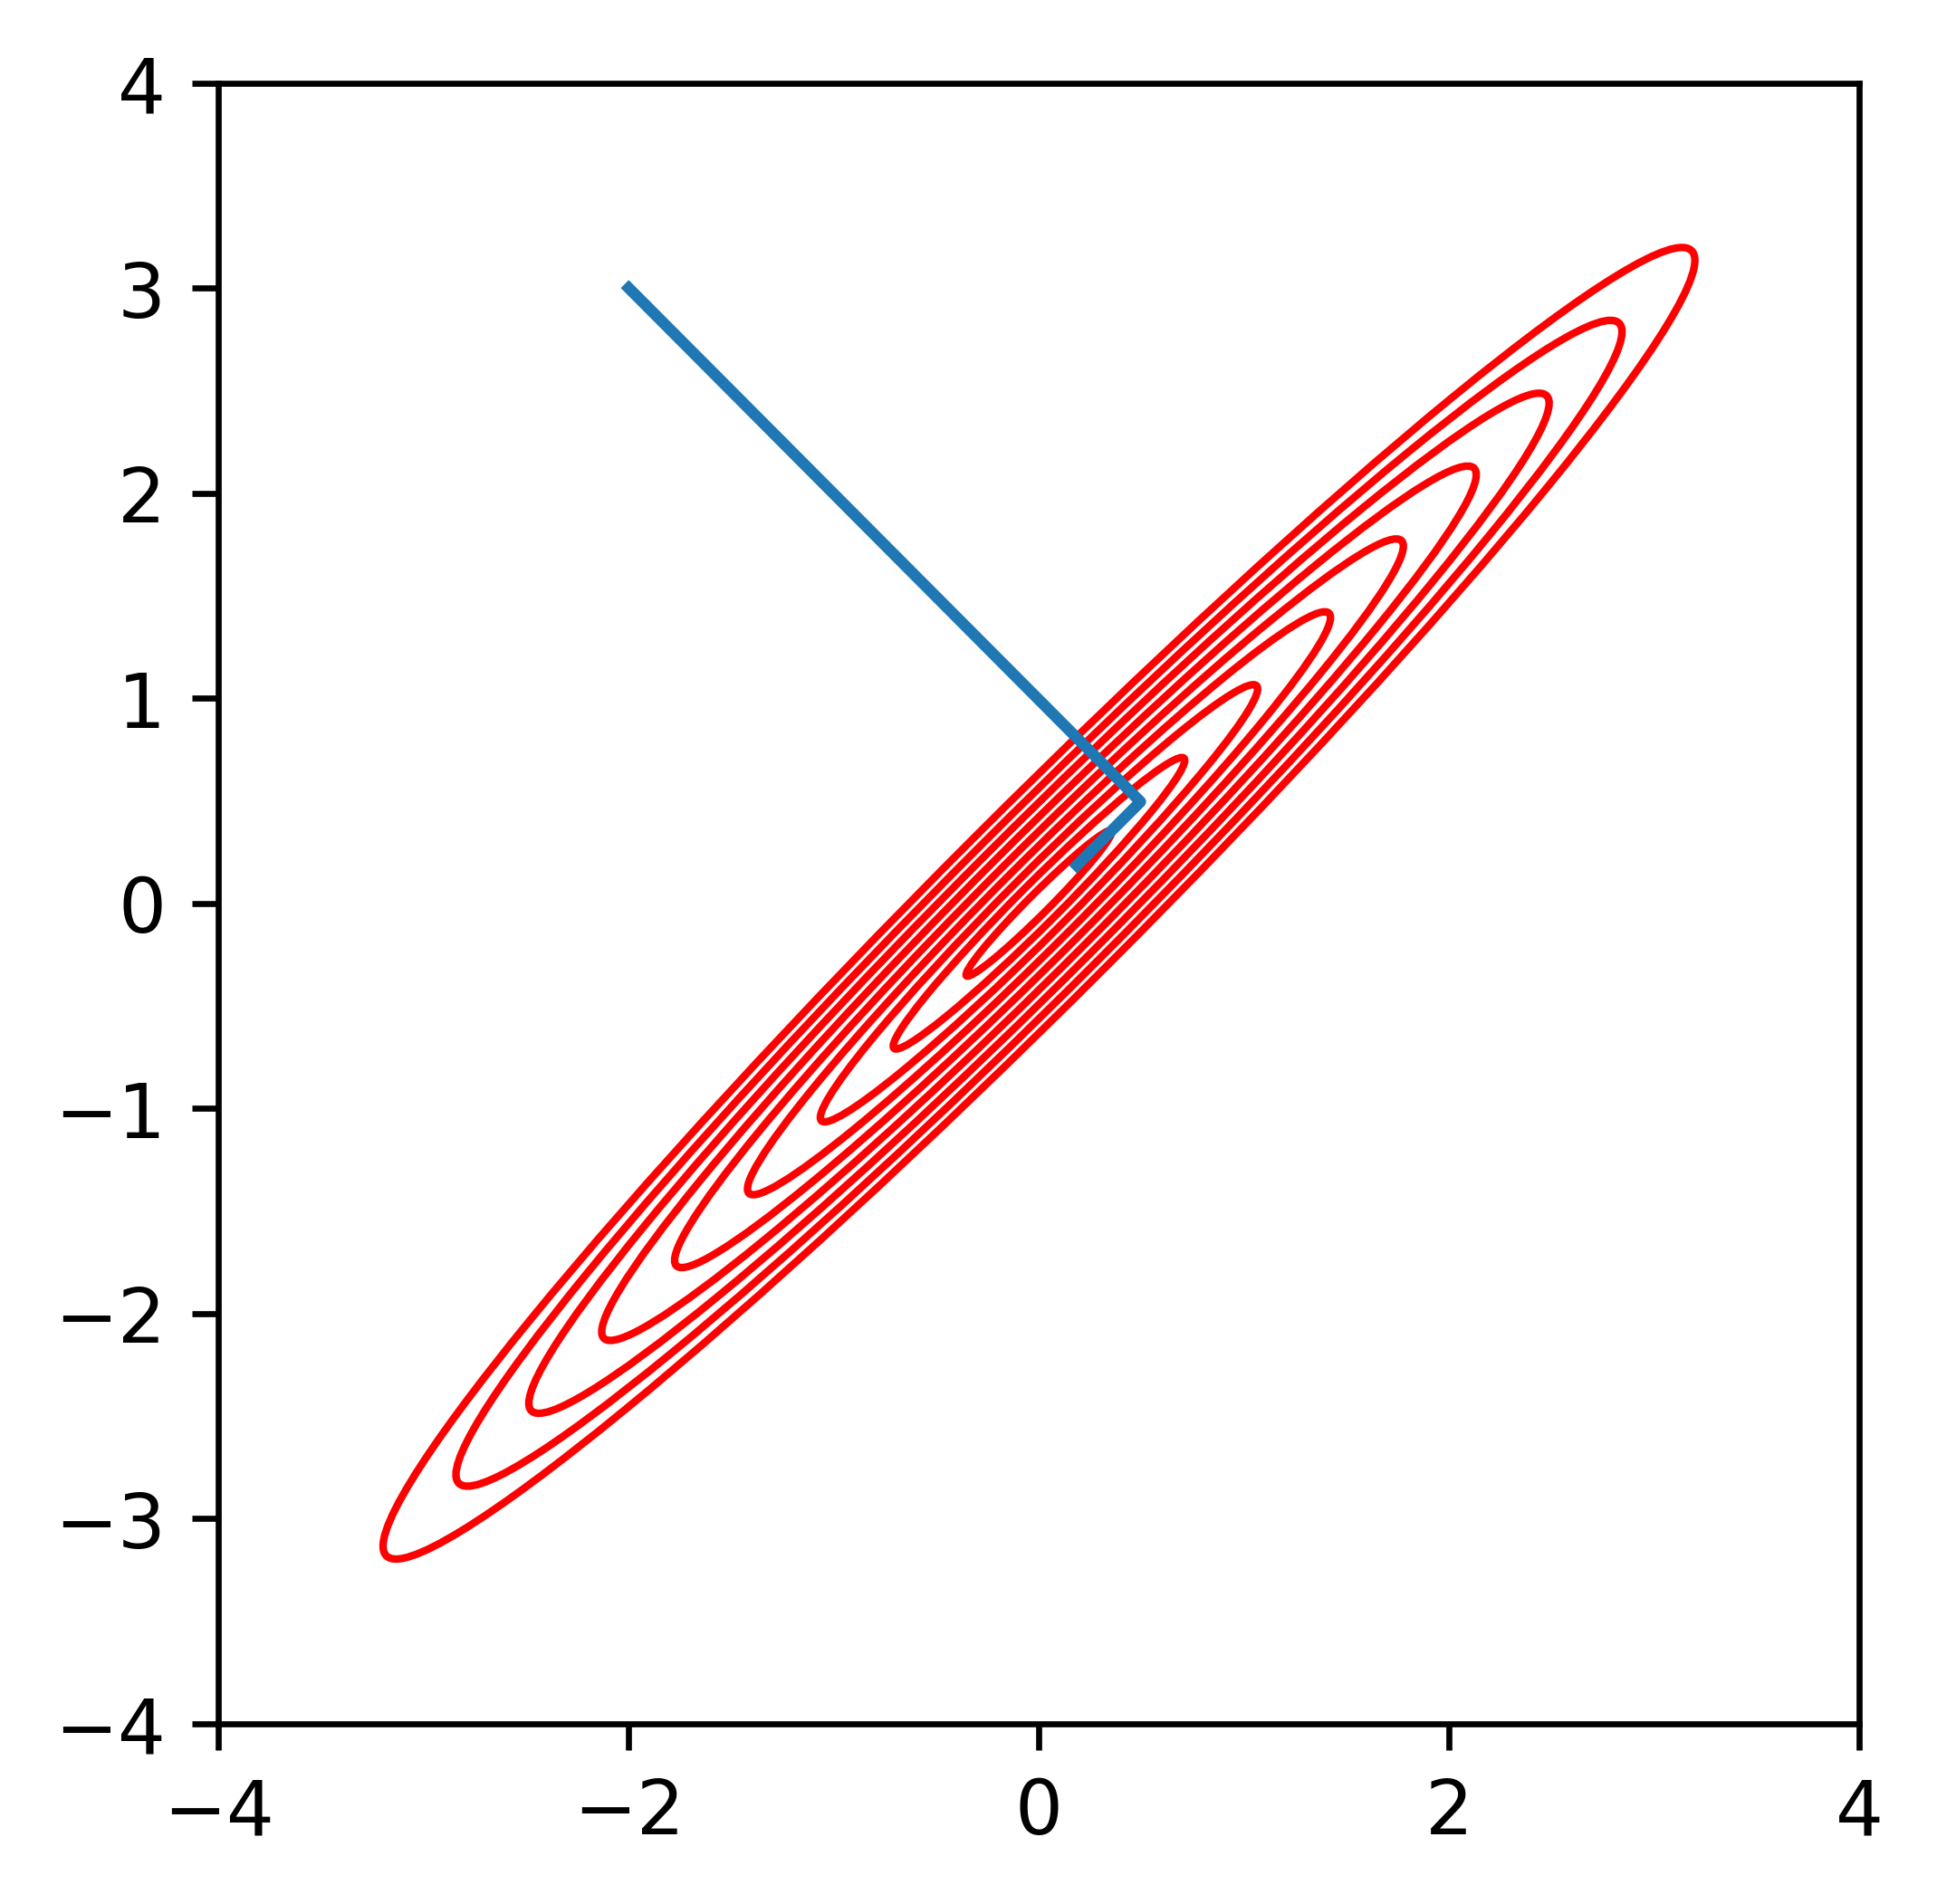

0.18486481882486355
0.18486481882486355


In [8]:
T = 100
x = np.zeros([T])
y = np.zeros([T])

x[0] = -2
y[0] = 3

alpha = 0.005

for i in range (1,T):
    x[i] = x[i-1] - alpha * (2*M[0,0]*x[i-1] + (M[0,1]+M[1,0])*y[i-1])
    y[i] = y[i-1] - alpha * (2*M[1,1]*y[i-1] + (M[0,1]+M[1,0])*x[i-1])

ax = plt.subplot(111, aspect='equal')
for scale in np.arange (10):
    width = scale * a
    height = scale * b
    e = Ellipse((x0, y0), width, height, theta * 180 / np.pi
           , facecolor = 'none', edgecolor = 'r')
    ax.add_artist(e)

plt.plot(x,y)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
print(x[T-1])
print(y[T-1])
